<a href="https://colab.research.google.com/github/rahiakela/data-science-research-and-practice/blob/main/think-stats/02_probability_mass_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [1]:
import numpy as np
from os.path import basename, exists

In [2]:
def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)

In [3]:
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkstats2.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/thinkplot.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/first.py")

download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats2/raw/master/code/2002FemPreg.dat.gz")

Downloaded thinkstats2.py
Downloaded thinkplot.py
Downloaded nsfg.py
Downloaded first.py
Downloaded 2002FemPreg.dct
Downloaded 2002FemPreg.dat.gz


In [4]:
from collections import Counter

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

In [5]:
# agian, let's select live births
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome ==1]

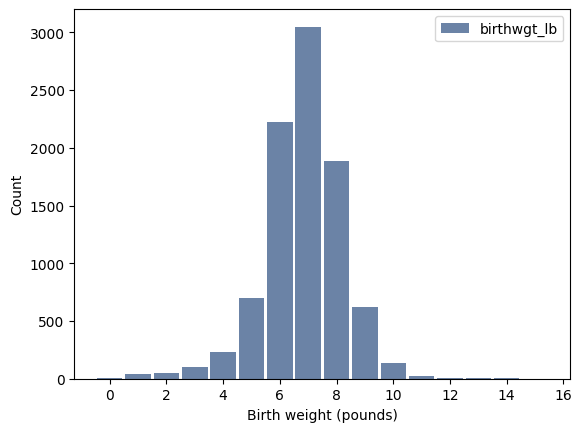

In [6]:
# Here's the histogram of birth weights
hist = thinkstats2.Hist(live.birthwgt_lb, label="birthwgt_lb")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="Count")

##PMF

A probability is a frequency expressed as a
fraction of the sample size, `n`. To get from frequencies to probabilities, we divide through
by `n`, which is called normalization.

Another way to represent a distribution is a probability mass function (PMF), which
maps from each value to its probability

Given a Hist, we can make a dictionary that maps from each value to its probability:

In [7]:
# To normalize the disrtibution, we could divide through by the total count
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
  pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

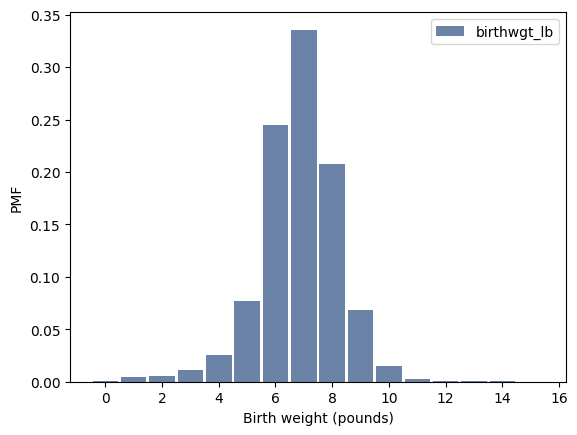

In [8]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel="Birth weight (pounds)", ylabel="PMF")

More directly, we can create a PMF object.

In [9]:
pmf = thinkstats2.Pmf([1, 2, 2, 3, 5])
pmf

Pmf({1: 0.2, 2: 0.4, 3: 0.2, 5: 0.2})

The PMF is normalized so total probability is 1.

In [10]:
pmf.Prob(2)

0.4

In [11]:
pmf.Prob(3)

0.2

In [12]:
pmf[2]

0.4

In [13]:
pmf[3]

0.2

The biggest difference is that a Hist maps from values to integer
counters; a PMF maps from values to floating-point probabilities.

We can modify an existing PMF by incrementing the probability associated with a value

In [14]:
pmf.Incr(2, 0.2)
pmf[2]

0.6000000000000001

In [15]:
pmf.Incr(3, 0.5)
pmf[3]

0.7

Or you can multiply a probability by a factor.

In [16]:
pmf.Mult(2, 0.5)
pmf[2]

0.30000000000000004

If you modify a PMF, the result may not be normalized; that is, the probabilities may no
longer add up to 1.

Total returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [17]:
pmf.Total()

1.4

Normalize divides through by the total probability, making it 1 again.

In [18]:
pmf.Normalize()
pmf.Total()

1.0

##Plotting PMFs

In [19]:
# Here's the PMF of pregnancy length for live births
pmf = thinkstats2.Pmf(live.prglngth, label="prglngth")

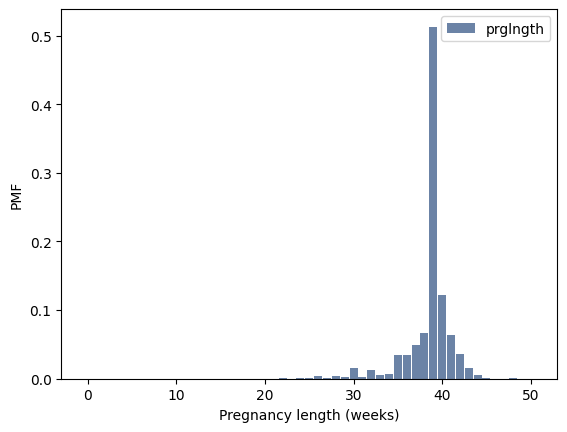

In [20]:
# Here's what it looks like plotted with Hist, which makes a bar graph
thinkplot.Hist(pmf)
thinkplot.Config(xlabel="Pregnancy length (weeks)", ylabel="PMF")

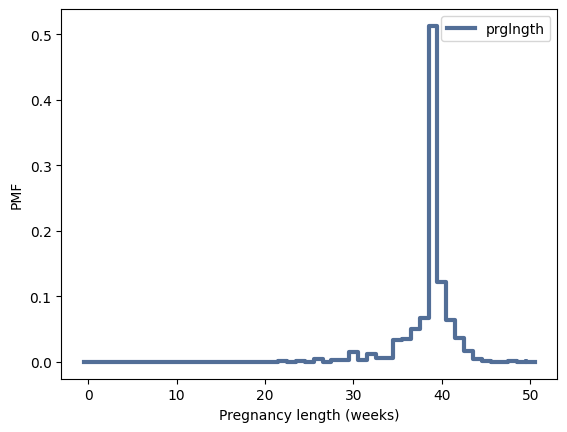

In [21]:
# Here's what it looks like plotted with Pmf, which makes a step function.
thinkplot.Pmf(pmf)
thinkplot.Config(xlabel="Pregnancy length (weeks)", ylabel="PMF")

We can use MakeFrames to return DataFrames for all live births, first babies, and others.

In [22]:
live, firsts, others = first.MakeFrames()

# Here are the distributions of pregnancy length.
first_pmf = thinkstats2.Pmf(firsts.prglngth, label="firsts")
other_pmf = thinkstats2.Pmf(others.prglngth, label="others")

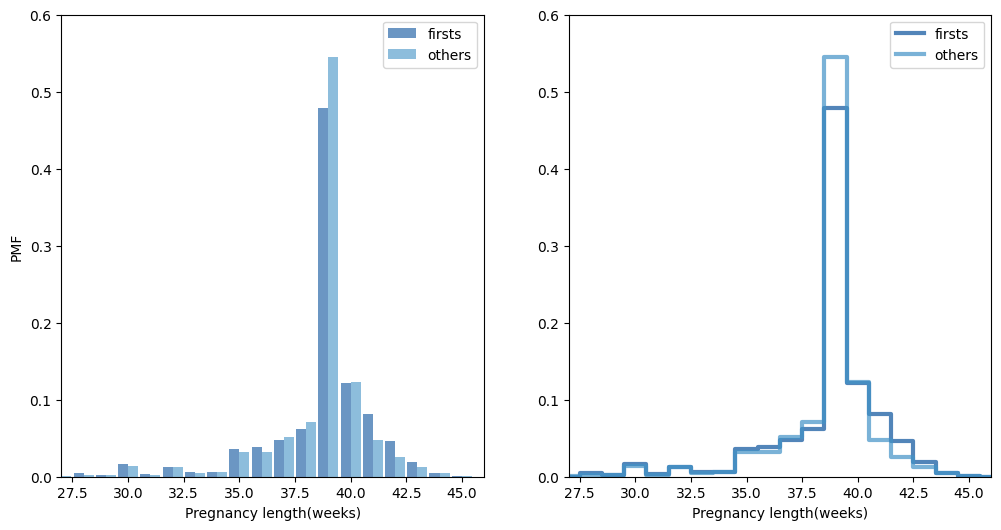

In [23]:
width = 0.45
axis = [27, 46, 0, 0.6]

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align="right", width=width)
thinkplot.Hist(other_pmf, align="left", width=width)
thinkplot.Config(xlabel="Pregnancy length(weeks)", ylabel="PMF", axis=axis)

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel="Pregnancy length(weeks)", axis=axis)

##Other Visualizations

##Exercises